In [ ]:
pip install pylatexenc # Install pylatexenc used to plot quantum circuit 

     |████████████████████████████████| 163kB 7.5MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.8-cp36-none-any.whl size=131377 sha256=d605ae3a601083185467251b09f732107356d8d0b7861aa96723aa3b390fa93a
  Stored in directory: /root/.cache/pip/wheels/88/23/90/4cf49f59c1eb67af40a2b3a580536bb5f91d40bc0d4cc8e035
Successfully built pylatexenc


In [ ]:
!pip install qiskit  # Install the qiskit

     |████████████████████████████████| 8.5MB 5.8MB/s 
     |████████████████████████████████| 17.6MB 258kB/s 
     |████████████████████████████████| 204kB 50.3MB/s 
     |████████████████████████████████| 204kB 36.7MB/s 
     |████████████████████████████████| 2.1MB 37.8MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 1.3MB 46.4MB/s 
     |████████████████████████████████| 5.9MB 44.4MB/s 
     |████████████████████████████████| 194kB 50.0MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 614kB 42.0MB/s 
     |████████████████████████████████| 102kB 12.4MB/s 
     |████████████████████████████████| 2.6MB 42.9MB/s 
     |████████████████████████████████| 5.5MB 23.8MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.2-cp36-none-any.whl size=2876 sha256=d8b0d47c9fd9af61e024606804410d6944232af1de14bdd436129d9c51e084b1
  Stored in directory: /root/.cache/pip/wheels/c2/62/3e/d5aeec3b19ba0

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table  # See the version of Qiskit

In [ ]:

# Qiskit module
from qiskit import QuantumCircuit
import qiskit.circuit.library as circuit_library
import qiskit.quantum_info as qi
import qiskit.ignis.mitigation as mit

# Qiskit tools for noisy simulation
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.utils import insert_noise

# Qiskit tools for running and monitoring jobs
from qiskit import execute
from qiskit.tools.monitor import job_monitor

# Other imports
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load IBMQ Account data
#from qiskit import IBMQ
#IBMQ.load_account()

# Get backend for experiment
#provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science')
#backend = provider.get_backend('ibmq_casablanca')
#properties = backend.properties()

In [ ]:
#backend = QasmSimulator.from_backend(provider.get_backend('ibmq_casablanca'))

In [ ]:

num_qubits = 7

# Adjacency matrix 
adjmat = [
    [0, 1, 0, 0, 0, 0, 0], 
    [1, 0, 1, 1, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 1, 1, 0, 1], 
    [0, 0, 0, 0, 0, 1, 0]]

In [ ]:
# (1/23) Is it possible to do gate calibration before making a graph state? 

# (1/23) If we can use extra qubit, what kind of quantum error correction code we can do here?

def create_graph_state(): # To create the graph state using circuit library.
    
    ### YOUR CODE GOES HERE -- START
    
    graph_state_circuit = circuit_library.GraphState(adjmat)
    
    ### YOUR CODE GOES HERE -- END
    
    return graph_state_circuit

# The Definition of Graph State
$\left|G\left(V,E\right)\right\rangle =\sum_{\left\{ i,j\right\} \in E}{\rm CZ}\left(i,j\right)\left|+\right\rangle ^{\otimes V}$,
where $\rm CZ$ means controll Z gate, $V$ represents vertexs and $E$ denotes the edges between $i,j$ vertexs. One can also define the operators $S_v$

$S_{v}=\sigma_{x}^{(v)}\prod_{\left\{ u,v\right\} \in E}\sigma_{z}^{(u)}$

of which one of eigenvectors is the graph state.

For instance, the triangle graph state $K_3$ can be express as

$\left|K_{3}\right\rangle =\frac{1}{\sqrt{8}}\left(\left|000\right\rangle +\left|100\right\rangle +\left|010\right\rangle +\left|001\right\rangle -\left|110\right\rangle -\left|101\right\rangle -\left|011\right\rangle -\left|111\right\rangle \right)$

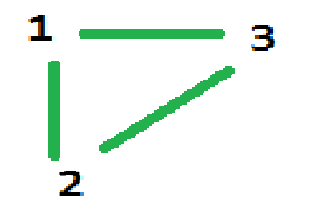

The corresponding operators are

$\left|S_{1}\right\rangle = \sigma_x \otimes \sigma_z \otimes \sigma_z$

$\left|S_{2}\right\rangle = \sigma_z \otimes \sigma_x \otimes \sigma_z$

$\left|S_{3}\right\rangle = \sigma_z \otimes \sigma_z \otimes \sigma_x$



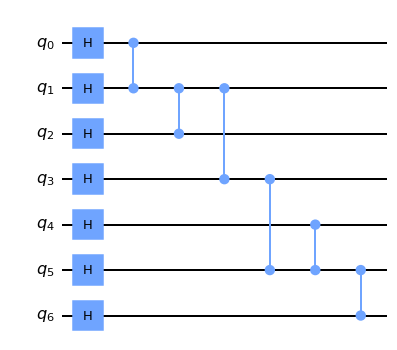

In [ ]:

# the graph state can be created using Qiskit's circuit library

state_circuit = create_graph_state()
state_circuit.draw(output = "mpl") # Show the quantum circuit used to create the graph state.

In [ ]:

def compute_stabilizer_group(circuit):
    """Compute the stabilizer group for stabilizer circuit."""
    state = qi.Statevector.from_instruction(circuit)
    labels = []
    for i in qi.pauli_basis(state.num_qubits):
        val = round(qi.state_fidelity(i.to_matrix()[0], state, validate=False))
        if val != 0:
            label = i.to_labels()[0]
            if val == 1:
                label = '+' + label
            else:
                label = '-' + label
            labels.append(label)
    return labels

def stabilizer_coeff_pauli(stabilizer):
    """Return the 1 or -1 coeff and Pauli label."""
    coeff = 1
    pauli = coeff
    if stabilizer[0] == '-':
        coeff = -1
    if stabilizer[0] in ['+', '-']:
        pauli = stabilizer[1:]
    else:
        pauli = stabilizer
    return coeff, pauli

def stabilizer_measure_circuit(stabilizer, initial_circuit=None): 
    """Return a stabilizer measurement circuits.
    
    Args:
        stabilizer (str): a stabilizer string
        initial_circuit (QuantumCircuit): Optional, the initial circuit.
    
    Returns:
        QuantumCircuit: the circuit with stabilizer measurements.
    """
    _, pauli = stabilizer_coeff_pauli(stabilizer)
    if initial_circuit is None:
        circ = QuantumCircuit(len(pauli))
    else:
        circ = initial_circuit.copy()
    for i, s in enumerate(reversed(pauli)):
        if s == 'X':
            circ.h(i)
        if s == 'Y':
            circ.sdg(i)
            circ.h(i)
    circ.measure_all()
    return circ

In [ ]:

## Compute the stabilizers for this graph state
generators = qi.Clifford(state_circuit).stabilizer.pauli.to_labels()
stabilizers = compute_stabilizer_group(state_circuit) #
print('Stabilizers:', stabilizers)
print('Generators:', generators) # The operaters of graph state

Stabilizers: ['+IIIIIII', '+IIIIIZX', '+IIIIXIX', '+IIIIXZI', '-IIIZYXY', '+IIIZYYZ', '+IIIZZXZ', '+IIIZZYY', '+IIXXIIX', '+IIXXIZI', '+IIXXXII', '+IIXXXZX', '-IIXYYXZ', '-IIXYYYY', '-IIXYZXY', '+IIXYZYZ', '+IZIXIIX', '+IZIXIZI', '+IZIXXII', '+IZIXXZX', '-IZIYYXZ', '-IZIYYYY', '-IZIYZXY', '+IZIYZYZ', '+IZXIIII', '+IZXIIZX', '+IZXIXIX', '+IZXIXZI', '-IZXZYXY', '+IZXZYYZ', '+IZXZZXZ', '+IZXZZYY', '+XIIXIIX', '+XIIXIZI', '+XIIXXII', '+XIIXXZX', '-XIIYYXZ', '-XIIYYYY', '-XIIYZXY', '+XIIYZYZ', '+XIXIIII', '+XIXIIZX', '+XIXIXIX', '+XIXIXZI', '-XIXZYXY', '+XIXZYYZ', '+XIXZZXZ', '+XIXZZYY', '+XZIIIII', '+XZIIIZX', '+XZIIXIX', '+XZIIXZI', '-XZIZYXY', '+XZIZYYZ', '+XZIZZXZ', '+XZIZZYY', '+XZXXIIX', '+XZXXIZI', '+XZXXXII', '+XZXXXZX', '-XZXYYXZ', '-XZXYYYY', '-XZXYZXY', '+XZXYZYZ', '+YXYIYXY', '-YXYIYYZ', '-YXYIZXZ', '-YXYIZYY', '-YXYZIII', '-YXYZIZX', '-YXYZXIX', '-YXYZXZI', '-YXZXYXZ', '-YXZXYYY', '-YXZXZXY', '+YXZXZYZ', '-YXZYIIX', '-YXZYIZI', '-YXZYXII', '-YXZYXZX', '-YYYXYXZ', '-YYYXYYY', '-

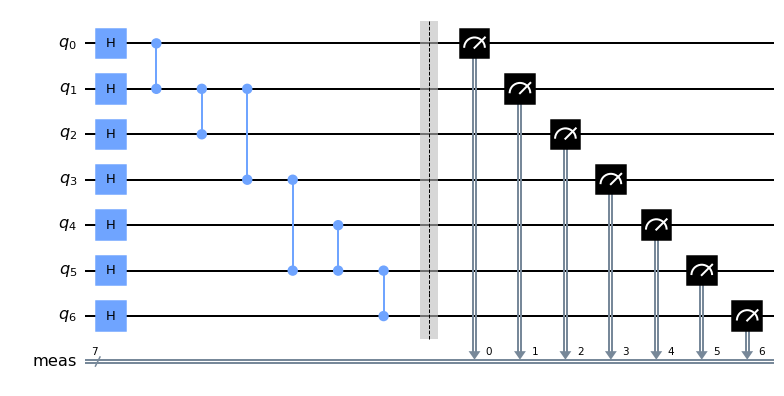

In [ ]:

## Append the stabilizer measurements to the graph state circuit 
stabilizer_circuits = [stabilizer_measure_circuit(stab, state_circuit)
                       for stab in stabilizers]


#  X: apply h gate so that one can measure it with x-basis

#  Y: apply sdg gate and h gate so that one can measure it with y-basis


stabilizer_circuits[0].draw(output = "mpl") # The first circuit to do the stabilizer mesurement with the first stabilizer operator. # IIIIIII.
#

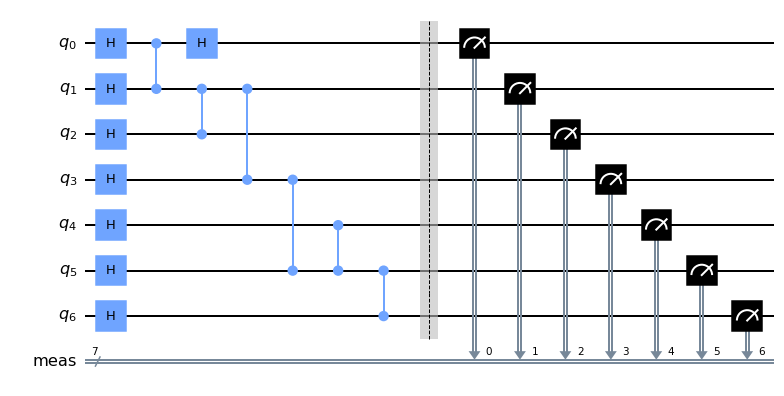

In [ ]:
stabilizer_circuits[1].draw(output = "mpl") # The second circuit to do the stabilizer mesurement with the second stabilizer operator, IIIIIZX.

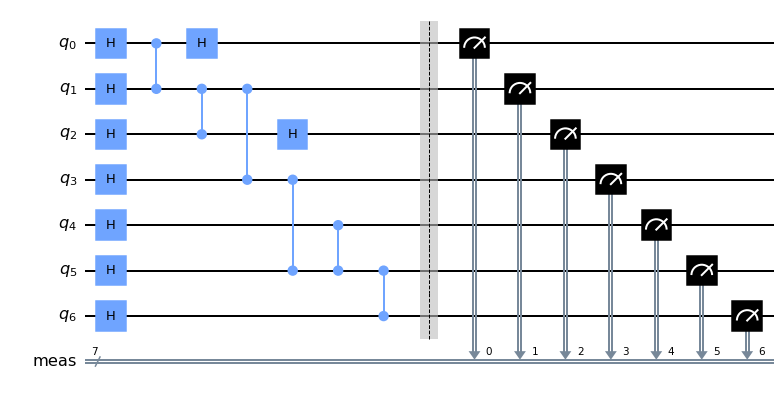

In [ ]:
stabilizer_circuits[2].draw(output = "mpl") # The third circuit to do the stabilizer mesurement with the third stabilizer operator, IIIIXIX.

In [ ]:
labels = ['0000000', '0000011', '0000101', 
          '0001001', '0001010', '0001100', 
          '0010001', '0010010', '0010100', '0011000', 
          '0100001', '0100010', '0100100', '0101000', '0110000', 
          '1000001', '1000010', '1000100', '1001000', '1010000', '1100000', 
          '1111111'] # States is used to calibrate the measurement error. 


# meas_cal_circuits: List of quantum circuits

# metadata: List of dictionary like below

# 'experiment': 'meas_mit',

# 'cal': label,

# 'method': method,


meas_cal_circuits, metadata = mit.expval_meas_mitigator_circuits(num_qubits, labels=labels) # Generate measurement error mitigator circuits and metadata



In [ ]:
[meas_cal_circuits_full, state_labels] = mit.complete_meas_cal(range(num_qubits)) # Return a list of measurement calibration circuits for the full Hilbert space.


In [ ]:
reps = 16

In [ ]:
# Create the noise model to simulate the real device
from qiskit import *
import numpy as np
from random import random
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit.providers.aer.noise as noise
prob_1 = 0.000435   # 1-qubit gate
prob_2 = 0.0175   # 2-qubit gate

# 1-qubit readout error 
probabilities = np.zeros((2,2))

probabilities[0] = np.array([0.966, 0.034])
probabilities[1] = np.array([0.034, 0.966])

RE = noise.errors.ReadoutError(probabilities)

# phase_amplitude_damping_error
error_1 = noise.phase_amplitude_damping_error(prob_1, 0.1, 1)


# Depolarizing quantum errors
#error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['h','x','sdg'])
noise_model.add_all_qubit_readout_error(RE)
noise_model.add_all_qubit_quantum_error(error_2, ['cz'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

In [ ]:

all_jobs = []
all_jobs_mit = []

for ii in range(reps):

    # Run QPT on backend
    shots = 8192
    il = [0,1,2,3,4,5,6] 
    
    job_backend = execute(stabilizer_circuits, Aer.get_backend('qasm_simulator'), shots=shots, initial_layout=il, basis_gates=basis_gates,noise_model=noise_model)
    job_mit_backend = execute(meas_cal_circuits, Aer.get_backend('qasm_simulator'), shots=shots, initial_layout=il, basis_gates=basis_gates,noise_model=noise_model)
    print('Job IDs ({}/{}): \n measurement calibration: {}\n stabilizer measurements: {}'.format(
        ii+1, reps, job_mit_backend.job_id(), job_backend.job_id()))

    all_jobs.append(job_backend)
    all_jobs_mit.append(job_mit_backend)

Job IDs (1/16): 
 measurement calibration: 61d1795b-72ab-4a33-977f-fb8285c01bea
 stabilizer measurements: ceb45478-30b3-4336-a235-c2dead48c77d
Job IDs (2/16): 
 measurement calibration: 08c6bb02-da7c-41d7-af5e-9ce79dc3120b
 stabilizer measurements: 9d5f4da4-f752-4ee8-9ac1-d956ca125acc
Job IDs (3/16): 
 measurement calibration: da926fdf-8f50-4e7c-a74a-037755ad8858
 stabilizer measurements: 7f902131-88e1-47d7-a68a-9a56e116cbcb
Job IDs (4/16): 
 measurement calibration: 9e9becfd-66c2-4558-911b-d70fd0fc4a74
 stabilizer measurements: 88264c94-13a1-422e-b25f-d0bd6c0efae5
Job IDs (5/16): 
 measurement calibration: 826edf34-5c96-43fe-b8fe-149459438edf
 stabilizer measurements: fb429e8c-9cc8-4f3b-848f-9b1c2a168aef
Job IDs (6/16): 
 measurement calibration: 9b2634a4-610c-4b8a-8e0c-09aa8e5111d8
 stabilizer measurements: 66452253-d93a-4cf1-b46e-260f9ee20177
Job IDs (7/16): 
 measurement calibration: e4d7678d-8c71-4a9a-bbd3-8e97dcd57540
 stabilizer measurements: 1380708e-9875-4075-8884-4c948e27431b

In [ ]:

for job in all_jobs:
    job_monitor(job)
    try:
        if job.error_message() is not None:
            print(job.error_message())
    except:
        pass

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [ ]:

result_backend = []
result_mit_backend = []
for job in all_jobs:
    # Retrieve results (this may take a while depending on the queue)

    result_backend.append(job.result()) # Record the result of stablizer circuit
    
for job in all_jobs_mit:

    result_mit_backend.append(job.result()) # Record the result of measurement calibration circuits

In [ ]:
def stabilizer_measure_diagonal(stabilizer):
    """Return the diagonal vector for a stabilizer measurement.
    
    Args:
        stabilizer (str): a stabilizer string
    
    Returns:
        np.ndarray: the diagonal for measurement in the stabilizer basis.
    """
    coeff, pauli = stabilizer_coeff_pauli(stabilizer)
    diag = np.array([1])
    for s in reversed(pauli):
        if s == 'I':
            tmp = np.array([1, 1])
        else:
            tmp = np.array([1, -1])
        diag = np.kron(tmp, diag)
    return coeff * diag
    
def stabilizer_fidelity(expvals, stddevs=None):
    """Compute stabilizer state fidelity from stabilizer expvals."""
    mean = np.mean(expvals)
    if stddevs is None:
        return mean
    stddev = np.sqrt(np.sum(stddevs ** 2))
    return mean, stddev

In [ ]:
#(1/23) Is it possible for three qubit readout error? Or mutli-qubit readout error?

def stabilizer_expvals(result, stabilizers, meas_mitigator=None):
    """Compute expectation values from stabilizer measurement results."""

    ### YOUR CODE GOES HERE -- START
    
    expvals = []
    stddevs = []
    for i, stab in enumerate(stabilizers):
        expval, stddev = mit.expectation_value(
            result.get_counts(i),
            diagonal=stabilizer_measure_diagonal(stab),
            meas_mitigator=meas_mitigator)
        expvals.append(expval)
        stddevs.append(stddev)
    return np.array(expvals), np.array(stddevs)

In [ ]:
## Mitigate the stabilizer expectation values 
F_nomit_backend = []
F_mit_backend = []

for ii in range(reps):
    # Unmitigated Expectation Values
    expvals_nomit_b, stddevs_nomit_b = stabilizer_expvals(
        result_backend[ii], stabilizers)
    
    # Fit measurement error mitigators
    mitigator_backend = mit.ExpvalMeasMitigatorFitter(result_mit_backend[ii], metadata).fit()

    # Measurement error mitigated expectation values
    expvals_mit_b, stddevs_mit_b = stabilizer_expvals(
        result_backend[ii], stabilizers, meas_mitigator=mitigator_backend)
    
    # save the fidelities for this iteration
    F_nomit_backend.append(stabilizer_fidelity(expvals_nomit_b, stddevs_nomit_b)[0])
    F_mit_backend.append(stabilizer_fidelity(expvals_mit_b, stddevs_mit_b)[0])

In [ ]:
## The final results

print('Graph-state fidelity estimates')
print('\nNo mitigation')
print('{:.3f} \u00B1 {:.3f}'.format(
     np.mean(F_nomit_backend), np.std(F_nomit_backend)))

print('\nCTMP error mitigation')
print('{:.3f} \u00B1 {:.3f}'.format(
     np.mean(F_mit_backend), np.std(F_mit_backend)))

Graph-state fidelity estimates

No mitigation
0.491 ± 0.001

CTMP error mitigation
0.700 ± 0.002
